In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
##importo archivo
housing_data = pd.read_csv('datasets/housing.csv')

In [16]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1641,-121.81,37.97,8.0,1584.0,236.0,615.0,202.0,6.4753,166800.0,INLAND
2855,-118.92,35.38,33.0,3122.0,579.0,1733.0,545.0,3.8307,70600.0,INLAND
10656,-117.83,33.67,17.0,2634.0,641.0,1454.0,560.0,3.7976,275000.0,<1H OCEAN
7818,-118.11,33.90,35.0,1323.0,269.0,1084.0,240.0,5.0753,178000.0,<1H OCEAN
9178,-118.53,34.37,8.0,3839.0,852.0,1342.0,593.0,3.9118,333700.0,<1H OCEAN


In [17]:
##borro los que tengan valores vacios
housing_data = housing_data.dropna()

In [18]:
housing_data.shape

(20433, 10)

In [19]:
##buscamos los casos que tienen el valor medio igual al maximo
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [20]:
##borramos los que tienen el valor en el maximo
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [21]:
housing_data.shape

(19475, 10)

In [22]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
##un distinct de los valores del campo proximidad al oceano
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [24]:
##vamos a modificar el valor de proximidad para que sea numerico
##ya que las operaciones de ML se realizar sobre datos numericos en Regresiones
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])
##esta funcion aplica reemplazo "One Hot" 

In [25]:
housing_data.shape
##la funcion anterior creo 5 nuevas columnas, una por cada valor discreto con valor 1 o 0

(19475, 14)

In [26]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7642,-118.27,33.82,36.0,1593.0,334.0,1427.0,320.0,4.4015,166900.0,1,0,0,0,0
9482,-123.10,39.36,19.0,1056.0,248.0,611.0,226.0,1.7460,105000.0,0,1,0,0,0
15347,-117.28,33.28,13.0,6131.0,1040.0,4049.0,940.0,3.8156,150700.0,1,0,0,0,0
9254,-120.07,36.97,27.0,968.0,240.0,587.0,231.0,1.6071,55000.0,0,1,0,0,0
2901,-119.02,35.38,52.0,90.0,35.0,36.0,31.0,0.8054,60000.0,0,1,0,0,0


In [27]:
##en X guardamos el valor de nuestras features columns
X = housing_data.drop('median_house_value', axis=1)
##en Y guardamos el target column
Y = housing_data['median_house_value']

In [28]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [29]:
##importamos librería que fracciona el dataset en test y train en una fracción
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
#en este caso 80/20 train/test

In [30]:
##el 80% de las features columns las convirtió a train set
x_train.shape

(15580, 13)

In [31]:
##el 20% de las features columns las convirtió a test set
x_test.shape

(3895, 13)

In [32]:
from sklearn.linear_model import LinearRegression

#creamos un modelo
#primero normalizamos los datos entre 0 y 1
#luego entrenamos (fit) los datos de los train_set tanto para features como targets
linear_model=LinearRegression(normalize=True).fit(x_train,y_train)


In [33]:
#imprimimos el % del score con el que los datos de entrenamiento se identificaron con el modelo generado
print("Training Score: ", linear_model.score(x_train,y_train))

Training Score:  0.617214430695467


In [34]:
##columnas que usamos como features
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [35]:
##ordenamos la lista de las columnas (features/predictors) en terminos de como afectan al target (median_value/Y)
coef = pd.Series(linear_model.coef_,predictors).sort_values()
print(coef)
#imprimimos y vemos de menor a mayor cada factor que incrementa el valor de la casa

ocean_proximity_INLAND        -26679.440925
longitude                     -23642.709512
latitude                      -21749.739655
population                       -30.441831
total_rooms                       -6.664425
households                        51.141048
total_bedrooms                    82.681870
housing_median_age               926.768435
ocean_proximity_NEAR BAY        6344.345060
ocean_proximity_<1H OCEAN      13707.316769
ocean_proximity_NEAR OCEAN     17257.813089
median_income                  38161.382493
ocean_proximity_ISLAND        196644.373385
dtype: float64


In [36]:
##usamos el modelo para predecir los valor en base al test set 
y_pred = linear_model.predict(x_test)


In [37]:
##comparamos y graficamos el resultado de las prediccions con el resultado real de las target test
df_pred_actual=pd.DataFrame({'predicted':y_pred,'real':y_test})
##vemos las primeras 10
df_pred_actual.head(10)

,predicted,real
18661,205020.405803,330800.0
3669,152648.412206,161600.0
2229,185791.486160,125300.0
9423,265152.738436,495800.0
16826,222714.402355,234600.0
7703,225651.329868,254700.0
7977,213421.261276,162600.0
15790,235408.547158,225000.0
15957,251431.560576,246200.0
7043,173789.009868,171400.0


In [38]:
##verificamos el % de certeza del modelo con otra librería
from sklearn.metrics import r2_score
print("Testing Score: ", r2_score(y_test, y_pred))

Testing Score:  0.5960043237075829


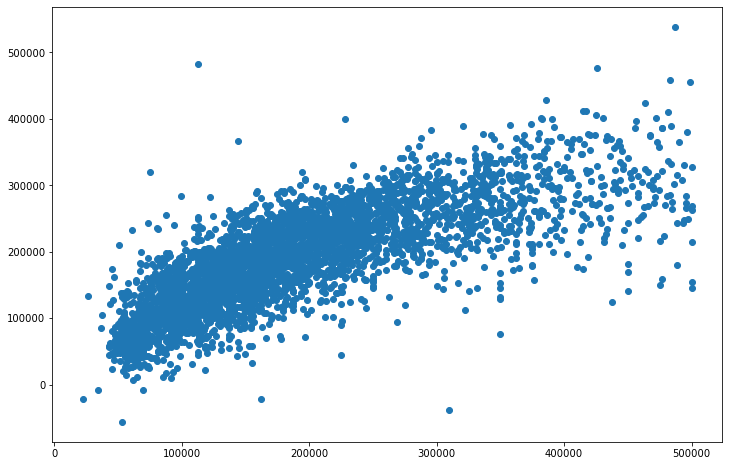

In [40]:
##graficamos relacion entre la predicción y la realidad
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test,y_pred)
plt.show()

In [41]:
#tomamos un ejemplo de 100 registros de nuestra colección de predicciones
df_pred_actual_sample=df_pred_actual.sample(100)
##reiniciamos el indice
df_pred_actual_sample=df_pred_actual_sample.reset_index()

In [42]:
df_pred_actual_sample.head(10)

,index,predicted,real
0,12060,107155.066170,122800.0
1,3154,114805.201560,99800.0
2,6379,232355.889750,388900.0
3,11545,269829.876159,235600.0
4,3218,73321.726615,120800.0
5,20402,231673.061505,211800.0
6,6922,236471.631729,188800.0
7,17902,247970.438168,237500.0
8,1968,129979.697836,151700.0
9,13487,100848.461967,87600.0


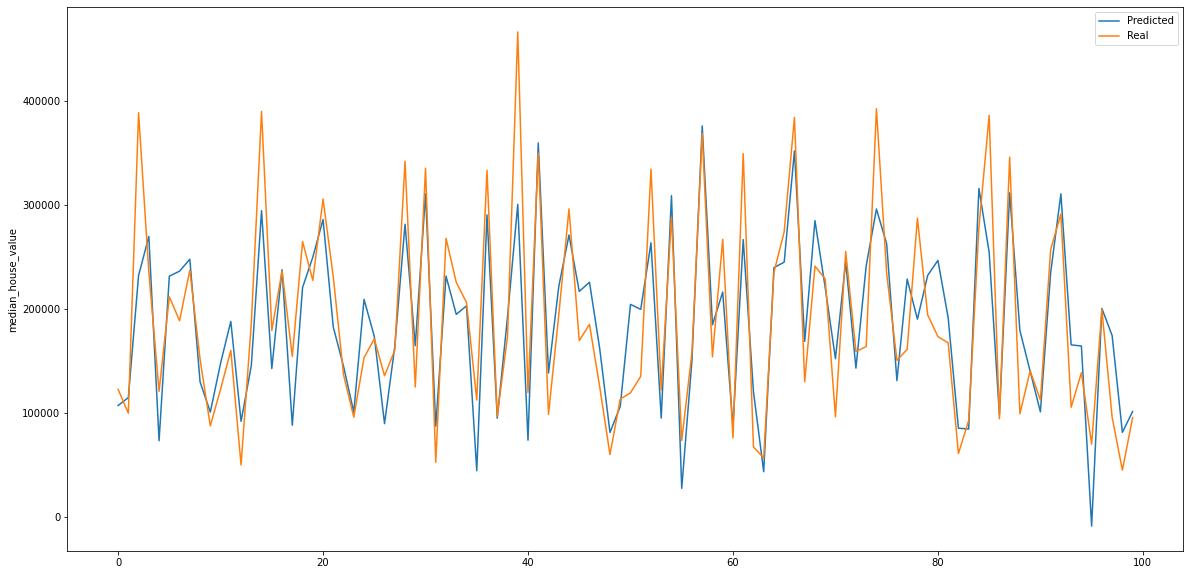

In [43]:
#graficamos para los ejemplos tomados de la predicción la relacion entre el real y la predicción
plt.figure(figsize=(20,10))
plt.plot(df_pred_actual_sample['predicted'],label='Predicted')
plt.plot(df_pred_actual_sample['real'],label='Real')
plt.ylabel('median_house_value')
plt.legend()
plt.show()